# The Cournot Model

In this project we will analyze the traditionel Cournot model, known from lectures at the Micro 1,2 and 3. In a Cournot the firms competes in quantities thereby choosing the quantites taken into account the best response of the other firms to that quantity. Firstly, we set up a general case for N competeting firms. Then we will simplify the setting and analyze a case firm case. 

In [78]:
# Importing useful packages e
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

from numpy import array
from scipy import linalg
from scipy import optimize



# Sympy package helps writting  

sm.init_printing(use_unicode=True)

from sympy import *

## The setting og the model:

We examine a market with $N$ firms, whom produce the same homogenous good. Furthermore we assume that the aggregate demand of the good x is linearly given by:
$$p(x)=c-x$$
Every firm $i$ has a costfunction given by:
$$C(x_i)=k*x_i^2$$ where the aggregate guantity in the market is given as $x=\sum_{j=0}^N(x_j)$

We then have that firm $i$ wish to maximize his profitfunction given by:
$$\underset{x_i}{max}: p(\sum_{j=0}^Nx_j)x_i)-C(x_i) =p(x)x_i-C(x_i)$$

So we have that firm $i$ is going to choose how much to produce given what the other firms in the market produces. It is intuitively that for $N\rightarrow \infty$ this modelsetup describes the setting of perfect competition. Futhermore it is intuitive to imagine that for $N\rightarrow 1$ the setting describes a monopolistic competition situation. These two outer cases will be examized later in the project.

We will now examine the more interessting case when there is only 2 firms  (A and B) competiting. We assume that firm a has a costfunction given by: $C_A=\frac{k}{2}*x_a^3$. The costfunction of firm b: $C_B=k*x_b^2$. 


In [79]:

# Defining the elements in the firms choice

c = sm.symbols('c')
qa, qb = sm.symbols('q_a q_b') 
k = sm.symbols('k')

In [80]:
# We start by defining the linear demand function:
def p_total(qa,qb,c):
    return (c-(qa+qb))

#Defining the cost function of firm A:
def c_A(qa,k):
    return (k/2*qa**2)

#Defining the cost function of firm B:
def c_B(qb,k):
    return (k*qb**2)

#The profitfunction of firm A:
def profit_A(qa,qb,c,k):
    return (p_total(qa,qb,c) * qa - c_A(qa,k))
    
#The profitfunction of firm B:
def profit_B(qa,qb,c,k):
    return (p_total(qa,qb,c) * qb - c_B(qb,k))

In [81]:
#We will now find the derivative, for which we will use to find the best response functions

foc_a = diff(profit_A(qa,qb,c,k),qa)
foc_b = diff(profit_B(qa,qb,c,k),qb)
display(foc_a,foc_b)


In [82]:
#We find the best responsefunctions by isolating respectively qa and qb in the above found derivatives
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]
solb
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )


 Firm A's best response is given by: q_a = (c - q_b)/(k + 2) and firm B's best response is given by: q_b =(c - q_a)/(2*(k + 1))


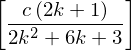

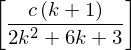

In [83]:
#To find the quantity firm A wants to produce we substitute firm B's best response function into firm A's bestreponse and then solving for q_a 
sola_subs = foc_a.subs(qb,solb) #substituting the best response into the FOC of firm A
sola_subs
q_astar = solve(sola_subs,qa) #Solving for q_a
solb_subs = foc_b.subs(qa,sola) #substituting the best response into the FOC of firm A
q_bstar = solve(solb_subs,qb)
display (q_astar, q_bstar)

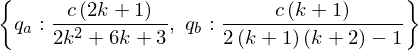

In [84]:
#Here we find the optimal quantities for both firms, where the firms take into account the best response of the other firm.

solve([foc_a, foc_b], [qa, qb]) #solving 2 equations with 2 unknowns 

In [85]:
#We are now able of finding the prices the firms will take for the good and the profit each firm get:

#(virker ikke - men her skulle vi gerne have beregning profit og priserne)
sm.init_printing(pretty_print=False)
display(q_astar,q_bstar)
p_total(4,5,6)
p_total(qa,qb,c)




[c*(2*k + 1)/(2*k**2 + 6*k + 3)]

[c*(k + 1)/(2*k**2 + 6*k + 3)]

c - q_a - q_b

In [86]:
Ved ikke helt hvad denne gør
#def reaction(qb,c,k):
    qa = optimize.brute(lambda x: -profit(qa,qb,c,k), ((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return x1[0]

SyntaxError: invalid syntax (<ipython-input-86-2a430b0b3bf8>, line 1)

# Numerical example

We will now examine the above 2 firm case, where we assume that $c=50$. Furthermore we assume that $k=3$

In [89]:
#We start by setting the values:
c=50
k=3

#The derivative:
foc_a = diff(profit_A(qa,qb,c,k),qa)
foc_b = diff(profit_B(qa,qb,c,k),qb)
display(foc_a,foc_b)

#The best responsefunctions 
sola= sm.solve(sm.Eq(foc_a,0),qa)[0]
solb= sm.solve(sm.Eq(foc_b,0),qb)[0]
print("\n Firm A's best response is given by: q_a = " + str(sola) + " and firm B's best response is given by: q_b =" + str(solb) )



-5.0*q_a - q_b + 50

-q_a - 8*q_b + 50


 Firm A's best response is given by: q_a = 10.0 - 0.2*q_b and firm B's best response is given by: q_b =25/4 - q_a/8


In [90]:
#We can now calculate the quantity firm A wants to produce, using the best response function of firm b 
sola_subs = foc_a.subs(qb,solb) #substituting the best response into the FOC of firm A
q_astar = solve(sola_subs,qa) #Solving for q_a
solb_subs = foc_b.subs(qa,sola) #substituting the best response into the FOC of firm A
q_bstar = solve(solb_subs,qb)
display (q_astar, q_bstar)

[8.97435897435897]

[5.12820512820513]

In [119]:
#As the above quantities os given as lists we start by defining/converting the list into a float:
type(q_astar)
qqa=q_astar[0]
qqb=q_bstar[0]
#We can now find the price of the good:
print("\n The price of the good: " + str(p_total(qqa,qqb,c)) ) 



 The price of the good:35.8974358974359


In [109]:
#We can now find the profit of each firm:
print("\n The profit of firm A: $\Pi$ = " + str(profit_A(qqa,qqb,c,k)) + " and firm B's best response is given by: q_b =" + str(profit_B(qqa,qqb,c,k)) )



 The profit of firm A: $\Pi$ = 201.347797501644 and firm B's best response is given by: q_b =105.193951347798


201.347797501644

In [70]:

# Best response of q1, substituting the q2 in equation 1

sol1_subs = foc_a.subs(qb,solb)
sol1_subs

c - k*q_a - 2*q_a - (c - q_a)/(2*(k + 1))

In [72]:
q_guess = [1] #randomly set

def best_responseA(qb,c,k):
    qa_opt = optimize.minimize(lambda x0: -profitA(q_guess,qb,c,d,k), q_guess).x[0]
    return qa_opt

def best_responseB(qa,c,k):
    qb_opt = optimize.minimize(lambda x0: -profitB(q_guess,qa,c,d,o), q_guess).x[0]
    return qb_opt


In [73]:

def conditions(q,parameters):
    u = q[0] - best_responseA(q[1],parameters[0],parameters[1])
    y = q[1] - best_responseB(q[0],parameters[0],parameters[2])
    return [u,y]

In [74]:

q = [2,2]

# Here we define the function, f, which contains a solver that solves the Nash equilibrium,
# given the parameters that are chosen in the sliders below.

def f(c,d,a,k):
    parameters = [a,c,d,k]
    solver = optimize.fsolve(conditions,q,args=(parameters))
    if solver[0] < 0:
        solver[0] = 0
    if solver[1] < 0:
        solver[1] = 0
        
    print("\n Nash Equilibrium: \n The Nash equilibrium, firm 1 produces " + str(round(solver[0],2)) + " units and firm 2 produces " + str(round(solver[1],2)) + " units.")

# Here three sliders are created:
    
widgets.interact(f,
    c = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    d = widgets.FloatSlider(description="$c_2$",min=0,max=5),
    a = widgets.FloatSlider(description="$a$", min=5,max=10),
    k = widgets.FloatSlider(description="$k$", min=5,max=10),
    o = widgets.FloatSlider(description="$o$", min=5,max=10),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.f(c, d, a, k)>

In [75]:
foc1 = diff(profit_A(qa,qb,c,d,k),qa)
foc2 = diff(profit_B(qa,qb,d,c,k,w),qb)

NameError: name 'd' is not defined

In [76]:
def conditions(q,parameters):
    u = q[0] - best_response1(q[1],parameters[0],parameters[1])
    y = q[1] - best_response2(q[0],parameters[0],parameters[2])
    return [u,y]